The goal of this notebook was to analyse the performance of EM and inference using various imputation methods for a real data set on which no assumption on the distribution can be made. 

In [1]:
from visualization import *
from imputation import compute_mses
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%reload_ext autoreload
%autoreload 2

We now try to perform the same analysis starting from a complete dataset of unknown distribution. Indeed, the EM algorithm relies on the assumption that the underlying distribution is known in this case compared to the other imputation methods. 

The dataset considered is not the source of interest and will not be described, the goal is simply to test the methods on data on which we cannot make any a priori assumption on the distribution. We extracted a subset of 'winequality-white.csv' dataset, considering 300 observations of the variables ('fixed acidity', volitile acidit, density and pH). 

We apply the Wilk-Shapiro test for normality which rejected the assumption of normality with a high certainty (p-value of order $10^{-32}$), as expected.

In [19]:
#import data
df = pd.read_csv('data/winequality-white.csv', sep=';')
#extracting a subset of the dataset
df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'pH']]
df = df.iloc[1000:1300]
df

,fixed acidity,volatile acidity,citric acid,pH
1000,8.0,0.19,0.36,3.15
1001,6.4,0.28,0.41,3.09
1002,6.4,0.28,0.43,3.09
1003,6.9,0.24,0.39,3.31
1004,5.8,0.36,0.26,3.34
...,...,...,...,...
1295,7.5,0.23,0.32,3.04
1296,7.5,0.38,0.33,3.32
1297,7.3,0.42,0.38,3.19
1298,7.3,0.34,0.39,3.30


In [20]:
from scipy.stats import shapiro, normaltest
#test for normality

# Assuming your data is stored in the variable 'data'
stat, p_value = shapiro(df)

# Print the test statistic and p-value
print("Shairo p-value:", p_value)
print("Normality rejected (at 5%)" if p_value < 0.05 else "Normality not rejected (at 5%)")

Shairo p-value: 1.3065153357260798e-35
Normality rejected (at 5%)


Mechanism:  MCAR


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Mechanism:  MAR


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Mechanism:  MNAR


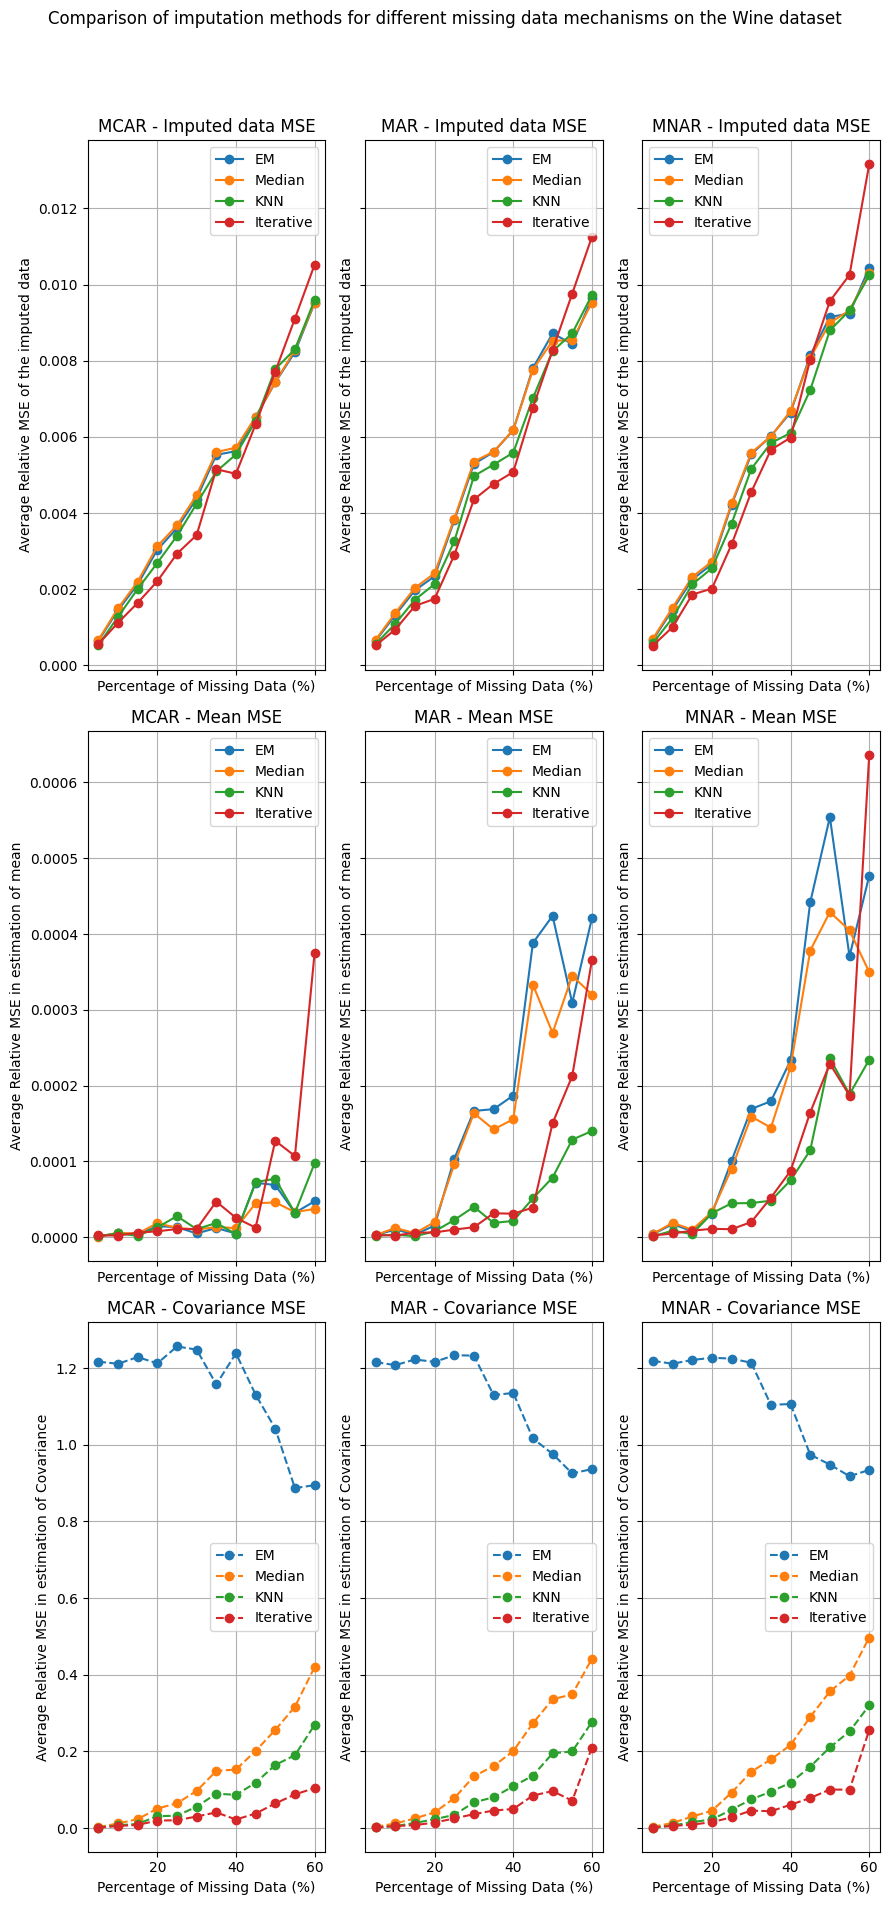

In [24]:
#the real mean and covariance are seen here as the empirical mean and covariance of the complete data
from numpy import real
X = df.values
real_mean = np.mean(X, axis=0)
real_cov = np.cov(X, rowvar=False)
#plotting results with different percentages of missing data and missing data mechanisms
plot_all_differences_combined(X, real_mean, real_cov, verbose =True, plot_title = 'Comparison of imputation methods for different missing data mechanisms on the Wine dataset')

We see a decent imputation of the data, no real difference between the different methods and the different missing data mechanisms. The inference of the mean is good especially for MCAR missingness, the error increses a lot with the total missing percentage for MNAR and MAR mechanisms. Iterative and KNN perform better than EM.

Note:

One should note that the creation of MAR or MCAR missingness with the logistic method might fail for other subset of the data as it requires the extraction of parameters that might not exist in some scenarios. 